<a href="https://colab.research.google.com/github/Otobi1/Bike-Demand-Prediction/blob/master/Bike_Demand_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Getting the data directly from the repo http://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand, 
# Here you have a brief description of the dataset and the attributes

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

--2021-03-30 16:57:31--  http://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604166 (590K) [application/x-httpd-php]
Saving to: ‘SeoulBikeData.csv.2’

SeoulBikeData.csv.2 100%[===================>] 590.01K  1.59MB/s    in 0.4s    

2021-03-30 16:57:32 (1.59 MB/s) - ‘SeoulBikeData.csv.2’ saved [604166/604166]



In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print ('Libraries imported successfully')

Libraries imported successfully


In [3]:
# Reading the data into a pandas dataframe

df = pd.read_csv("./SeoulBikeData.csv", encoding="unicode_escape")

# Making a copy of the original dataset

data = df.copy()

In [4]:
# Checking a sample of 20 observations in the dataset to get a good overview of what the data looks like

data.sample(20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7787,21/10/2018,1055,11,16.8,38,1.5,1326,2.3,2.07,0.0,0.0,Autumn,No Holiday,Yes
6941,16/09/2018,123,5,22.2,90,1.4,514,20.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
746,01/01/2018,178,2,-3.7,42,0.9,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes
3354,19/04/2018,2198,18,19.1,31,3.0,958,1.5,0.70,0.0,0.0,Spring,No Holiday,Yes
2063,24/02/2018,187,23,-0.6,39,1.3,1731,-12.8,0.00,0.0,0.0,Winter,No Holiday,Yes
5740,28/07/2018,340,4,28.3,83,1.7,814,25.1,0.00,0.0,0.0,Summer,No Holiday,Yes
718,30/12/2017,30,22,1.8,92,1.2,94,0.6,0.00,0.0,0.0,Winter,No Holiday,Yes
581,25/12/2017,32,5,-3.7,51,2.6,2000,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes
4148,22/05/2018,30,20,17.2,85,1.4,467,14.6,0.00,0.5,0.0,Spring,Holiday,Yes
3942,14/05/2018,552,6,12.1,89,0.3,252,10.3,0.02,0.0,0.0,Spring,No Holiday,Yes


In [5]:
# Checking the shape of the data

data.shape

(8760, 14)

In [6]:
# Problem statment and objective

"""Predict the 'Rented Bike Count', essentially the demand based on other attributes."""

"Predict the 'Rented Bike Count', essentially the demand based on other attributes."

In [7]:
# Reviewing the data types and the variables with null values 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Checking the null values (missing data) for the variables

data.isnull().sum() # No missing data

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Exploring the descriptive statistics for the numerical variables of the dataset.

data.describe() # note that this function will not return descriptives for categorical variables, only for continous variables

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
data.keys()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

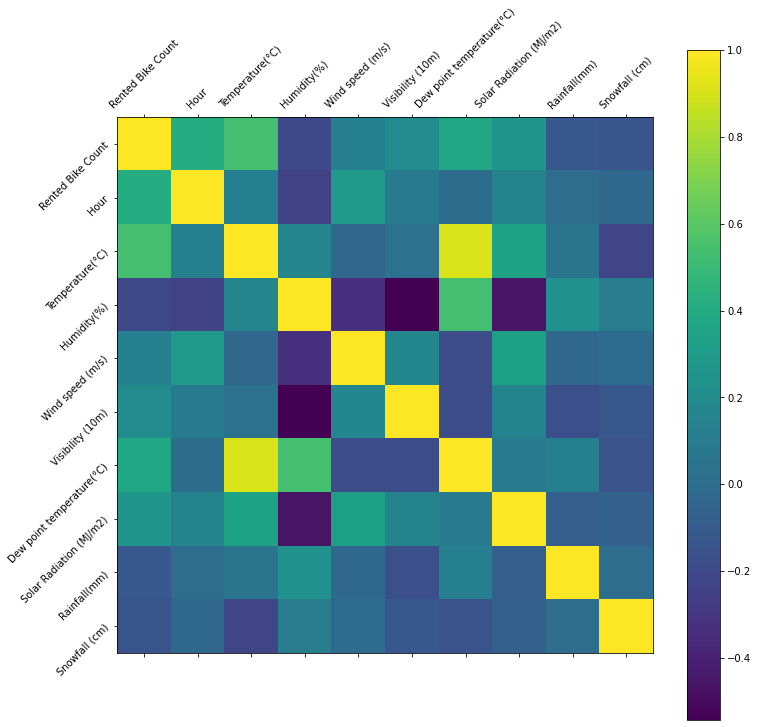

In [11]:
# Exploring the correlation between each of the continous variables and the target (outcome), in this case, the number of bikes rented.

f = plt.figure(figsize=(12, 12))
plt.matshow(data.corr(), fignum=f.number)
continous_features = data.describe().columns
plt.xticks(range(len(continous_features)), continous_features, rotation='45')
plt.yticks(range(len(continous_features)), continous_features, rotation='45')
plt.colorbar()
#plt.title('Correlation Matrix', fontsize=14)
plt.show()

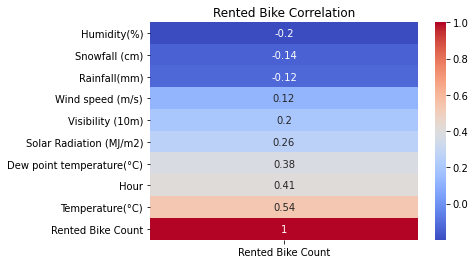

In [12]:
# Generating a heatmap to clearly outlay which variables are negatively and positively correlated with the Bike Demand

sns.heatmap(data.corr()[['Rented Bike Count']].sort_values('Rented Bike Count'), cmap='coolwarm', annot=True)
plt.title('Rented Bike Correlation')
plt.show()

# Inference here indicates that the temperature, the hour of the day, dew point temperature, solar radiation are the biggest predictors of the Rented Bike Count
# Higher temperature and daylight, including sunny days would result in higher bike renting. 
# the hummidity, snowfall and rainfall also affects bike renting; as these conditions worsen (increase), the demand for bikes reduces

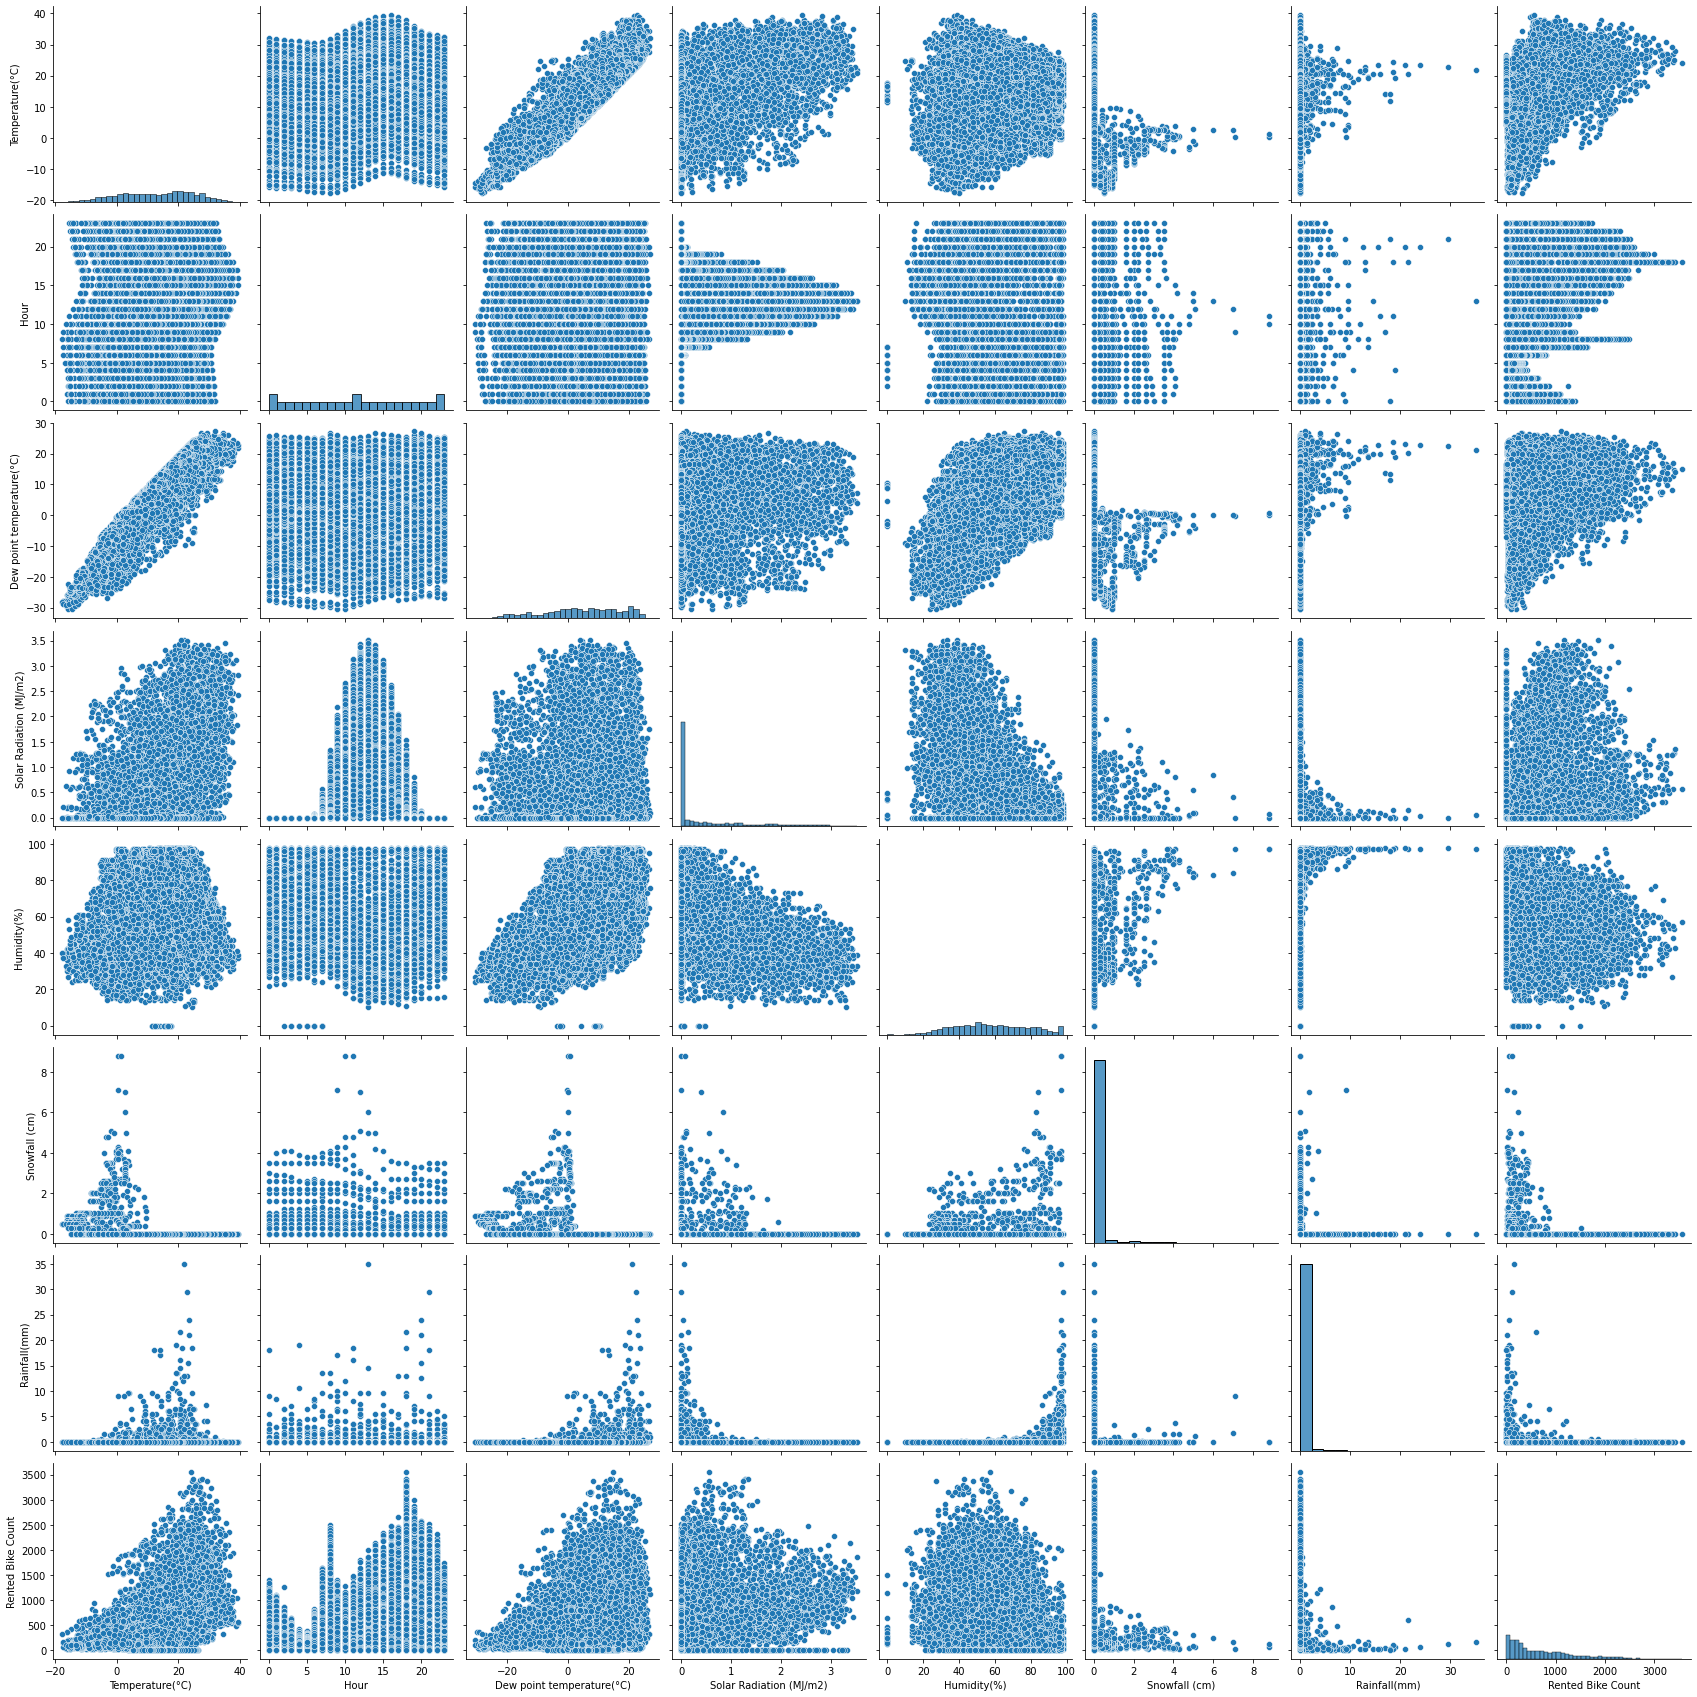

In [13]:
# Making a pairplot for the relevant variables identified above.

sns.pairplot(data[['Temperature(°C)', 'Hour', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Humidity(%)', 'Snowfall (cm)', 'Rainfall(mm)', 'Rented Bike Count']], height=3)


# sns.pairplot(data[data.describe().columns]) # this returns the pairplot for all the continous variables

Text(0, 0.5, 'Frequency')

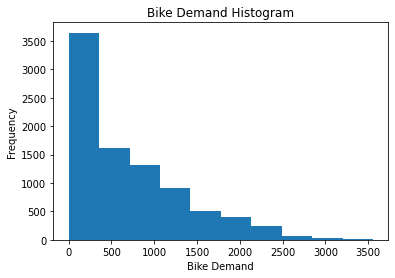

In [14]:
# Plotting the distribution curve of the bike demand 

plt.hist(data['Rented Bike Count'])
plt.title('Bike Demand Histogram')
plt.xlabel('Bike Demand')
plt.ylabel('Frequency')

# Overall the occurence of lower bike demand is higher 

In [15]:
# Checking the unique categories within the Holiday, Seasons and Functioning Day Variables 

data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [16]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [17]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
Holiday = data['Holiday'].str.get_dummies(sep = ',')

In [19]:
data = data.drop('Holiday', axis = 1)

In [20]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,Yes


In [21]:
data = pd.concat([data, Holiday], axis = 1, sort = False)

In [22]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Holiday,No Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,Yes,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,Yes,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,Yes,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,Yes,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,Yes,0,1


In [23]:
Seasons = data['Seasons'].str.get_dummies(sep = ',')

In [24]:
data = data.drop('Seasons', axis = 1)

In [25]:
data = pd.concat([data, Seasons], axis = 1, sort = False)

In [26]:
Functioning_Day = data['Functioning Day'].str.get_dummies(sep = ',')

In [27]:
Functioning_Day = Functioning_Day.add_prefix('Functioning ')

In [28]:
data = data.drop('Functioning Day', axis=1)

In [29]:
data = pd.concat([data, Functioning_Day], axis=1, sort=False)

In [30]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,No Holiday,Autumn,Spring,Summer,Winter,Functioning No,Functioning Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1,0,1


In [31]:
data.shape

(8760, 19)

In [33]:
data = data.drop('Date', axis=1)

In [35]:
# data.head()

data.shape

(8760, 18)

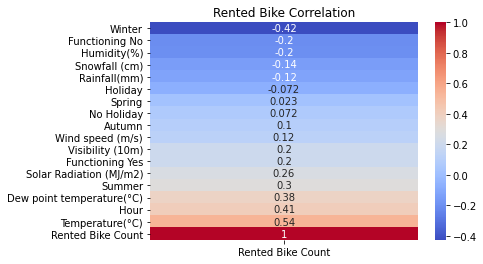

In [36]:
sns.heatmap(data.corr()[['Rented Bike Count']].sort_values('Rented Bike Count'), cmap='coolwarm', annot=True)
plt.title('Rented Bike Correlation')
plt.show()

# Inference:  After mapping all the categorical variables to dummy variables, essentially, one hot encode. 
# the correlation matrix clearly shows how the variables are correlated to the bike demand. 

In [39]:
# Saving the processed data to csv

# data.to_csv('processed_bike_demand.csv', index_label=False) if you want to download it out and move it around

from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [40]:
data.to_csv('/drive/My Drive/Colab Notebooks/processed_bike_demand.csv', index=False)

In [38]:
!ls -l

total 2308
-rw-r--r-- 1 root root 538377 Mar 30 17:10 processed_bike_demand.csv
drwxr-xr-x 1 root root   4096 Mar 18 13:36 sample_data
-rw-r--r-- 1 root root 604166 Mar  2  2020 SeoulBikeData.csv
-rw-r--r-- 1 root root 604166 Mar  2  2020 SeoulBikeData.csv.1
-rw-r--r-- 1 root root 604166 Mar  2  2020 SeoulBikeData.csv.2
